In [5]:
import WRIC_preprocessing as wric
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

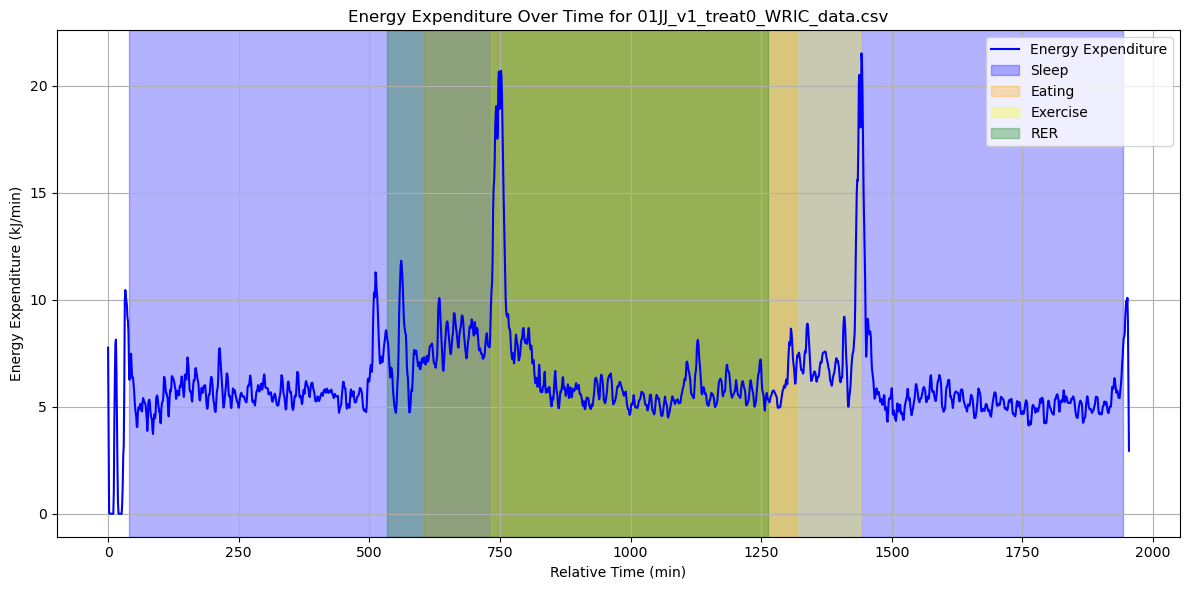

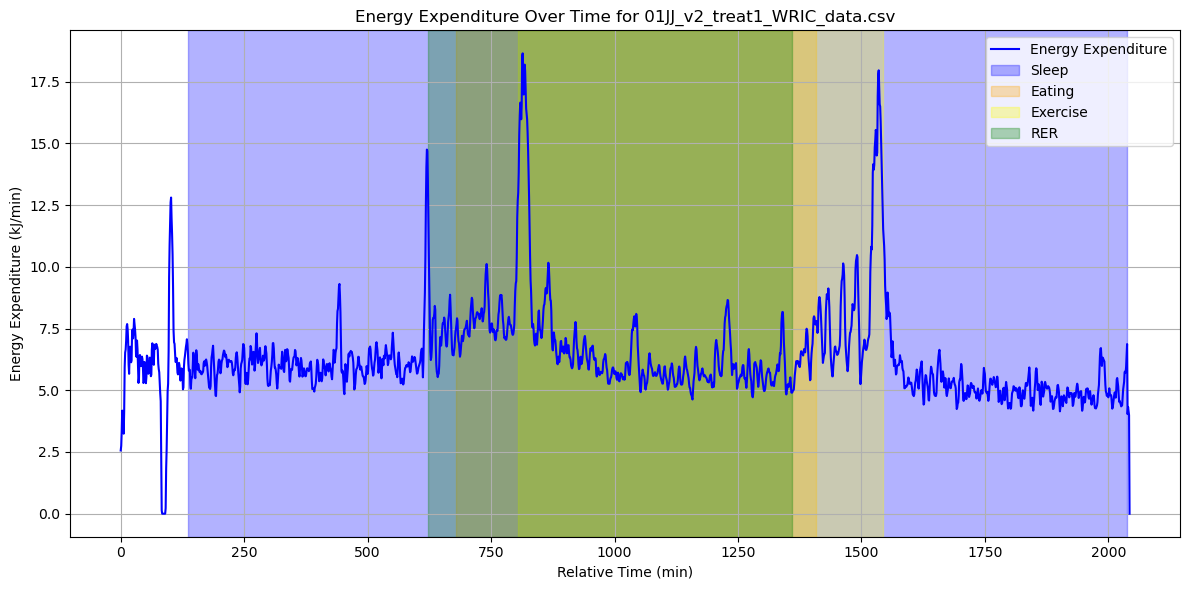

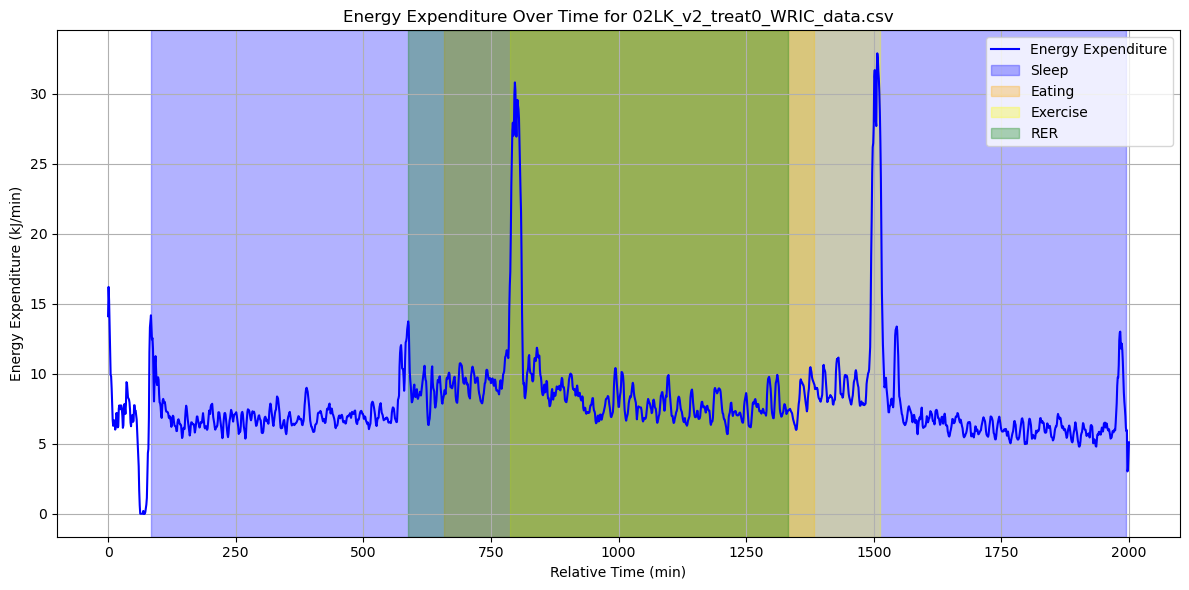

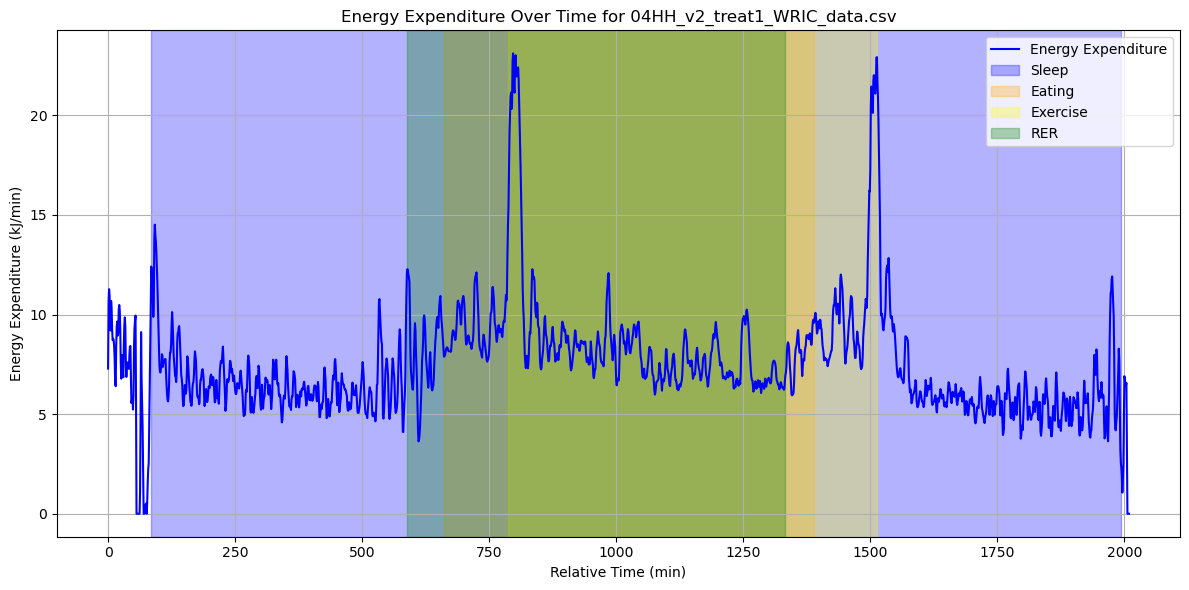

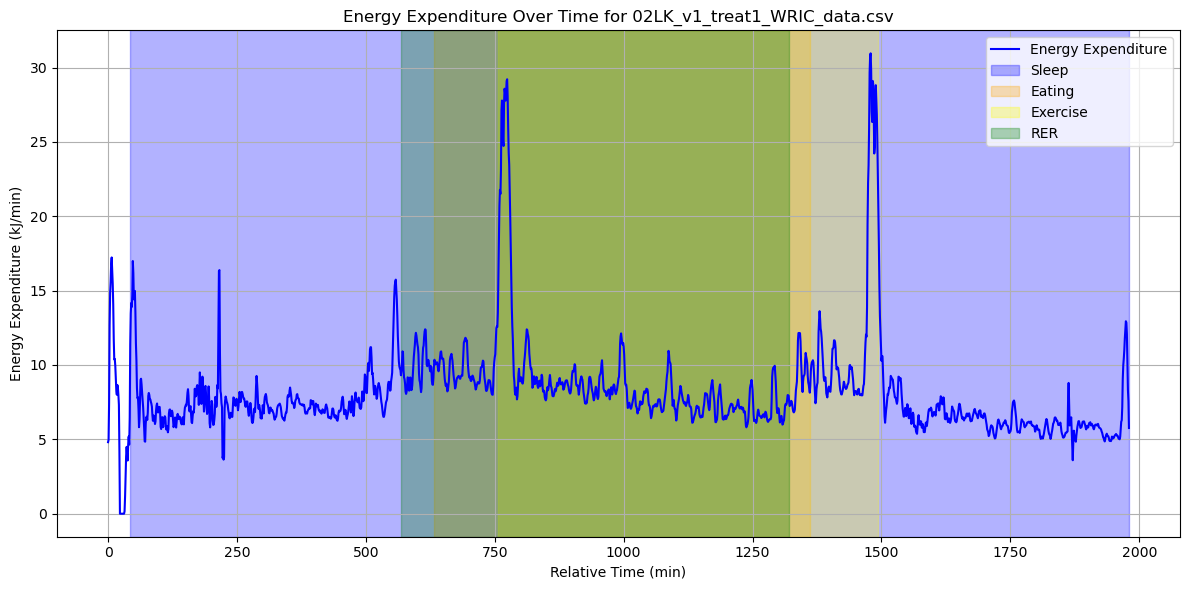

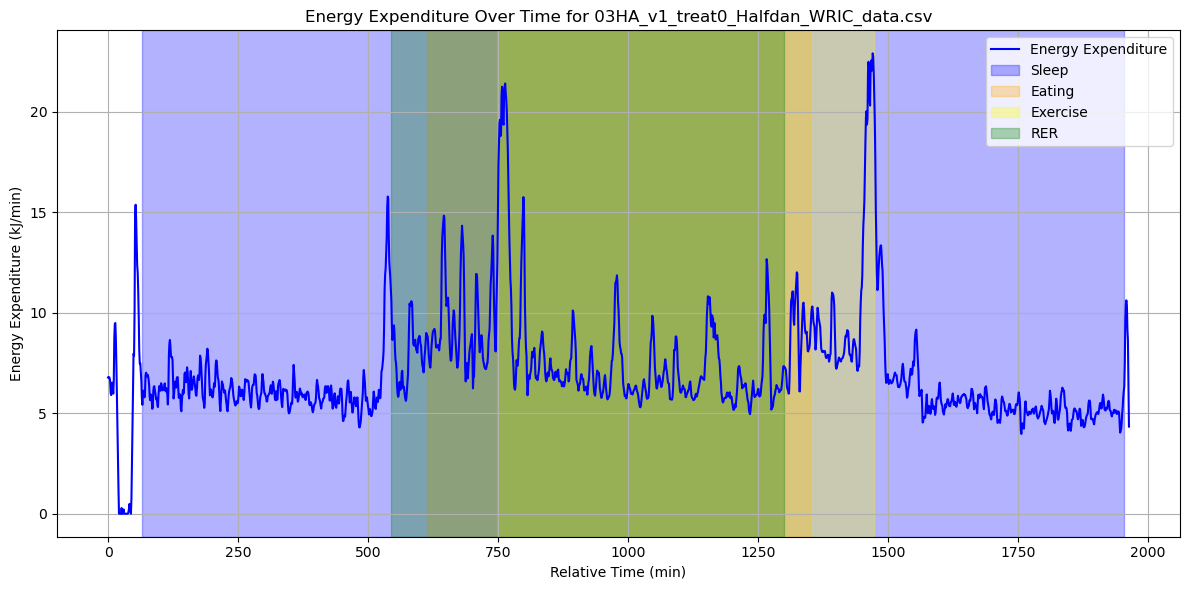

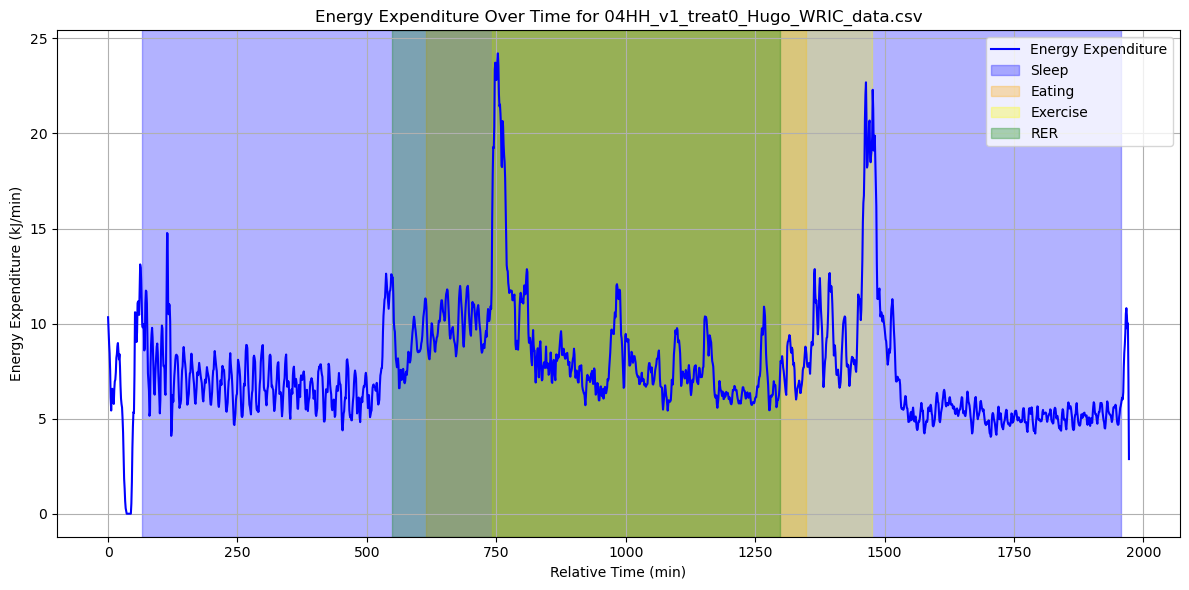

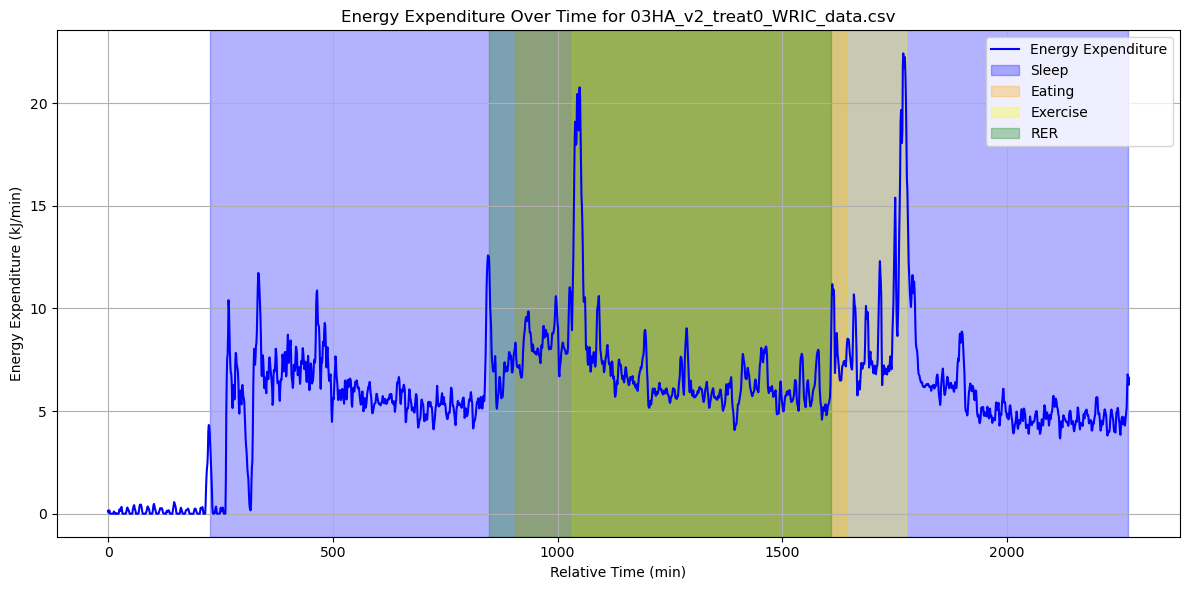

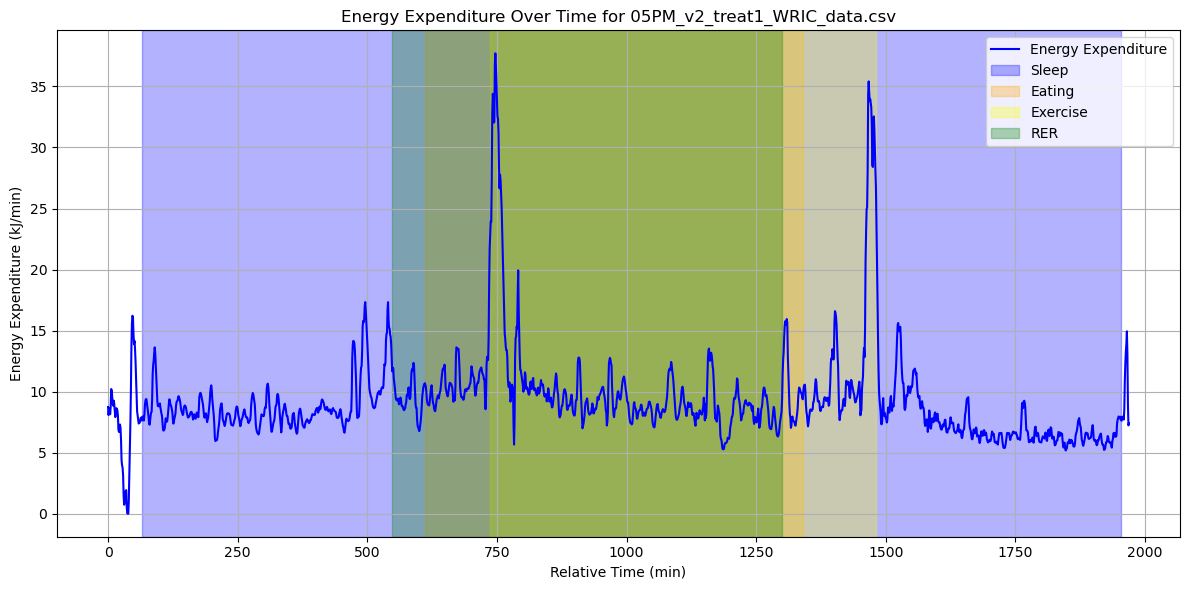

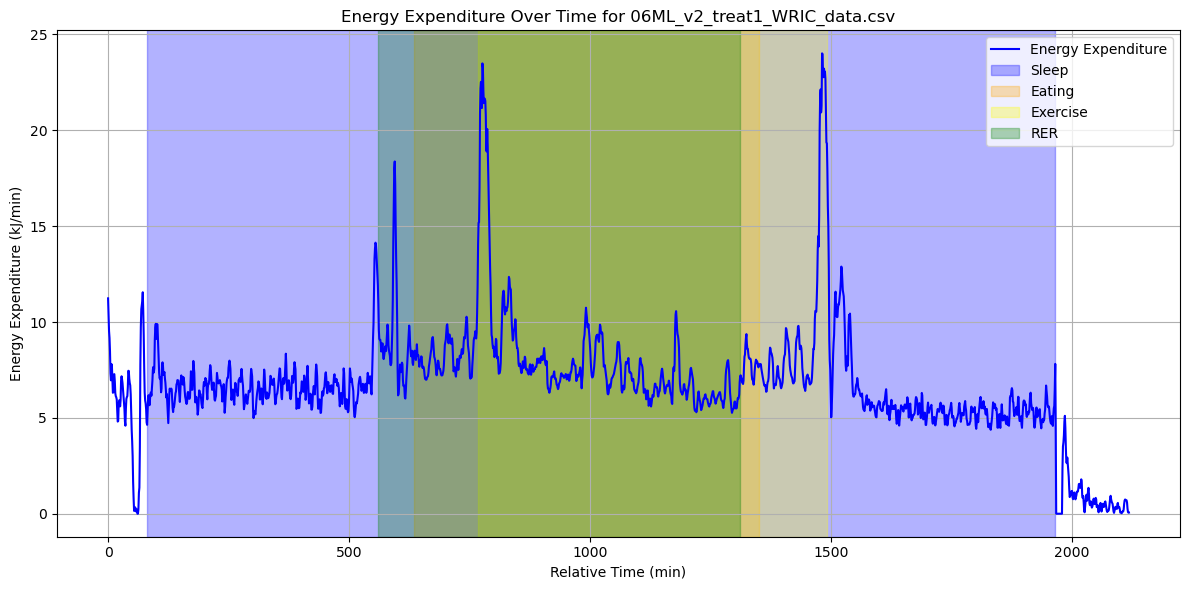

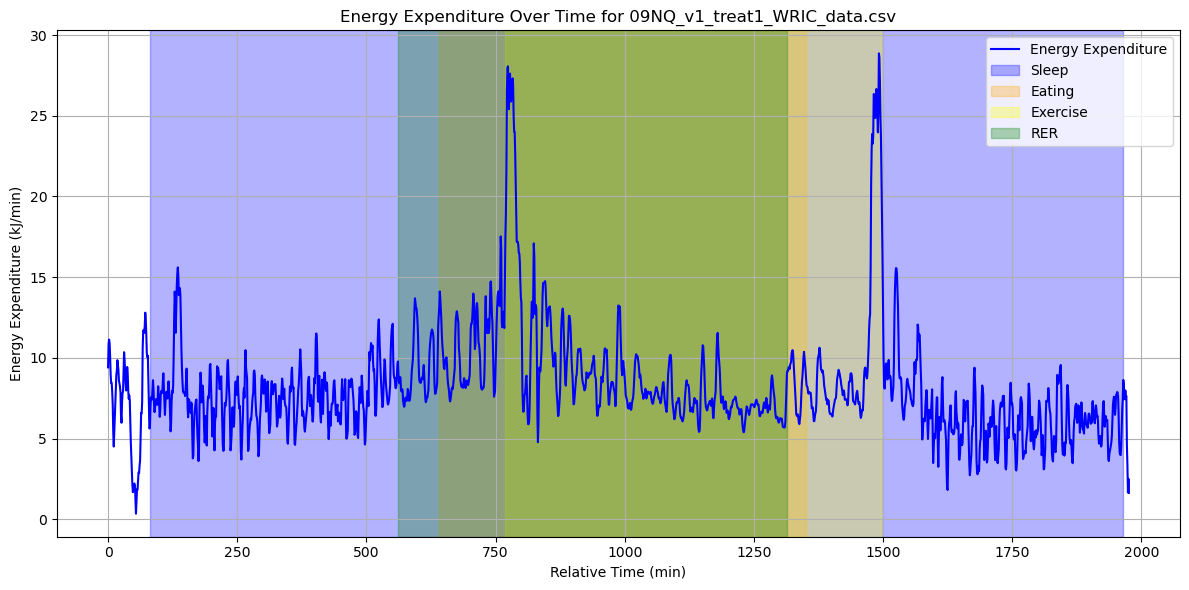

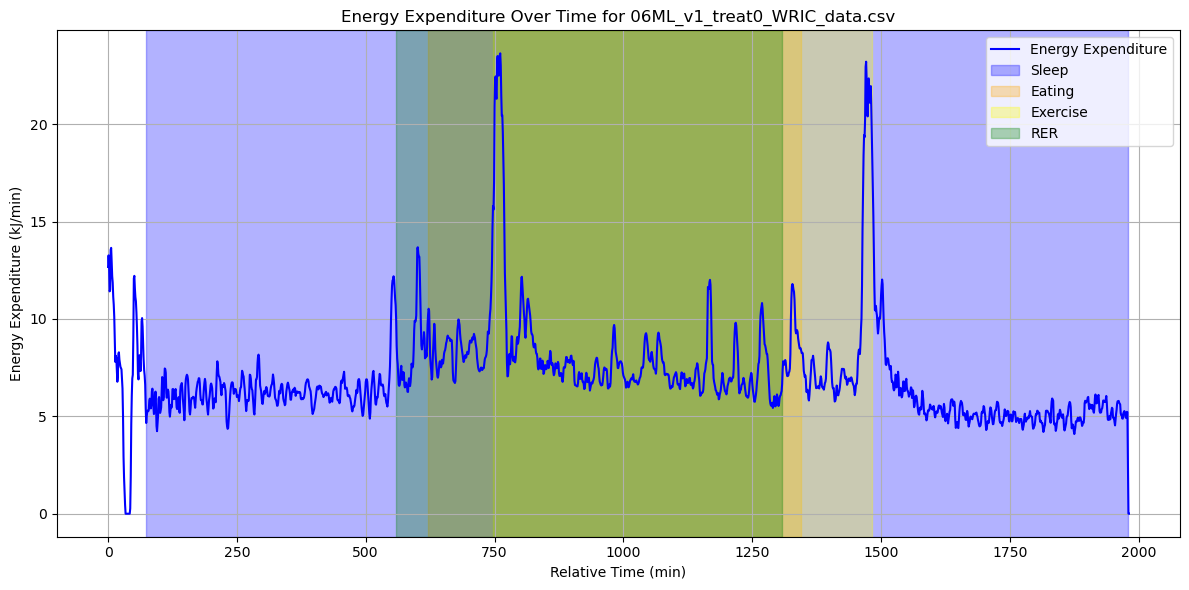

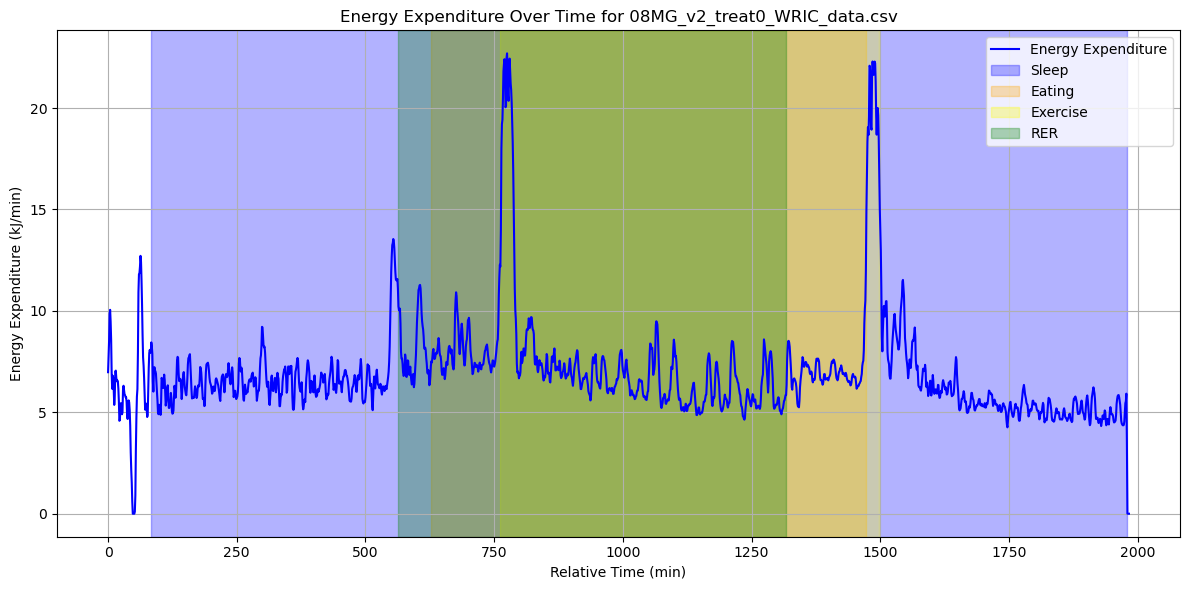

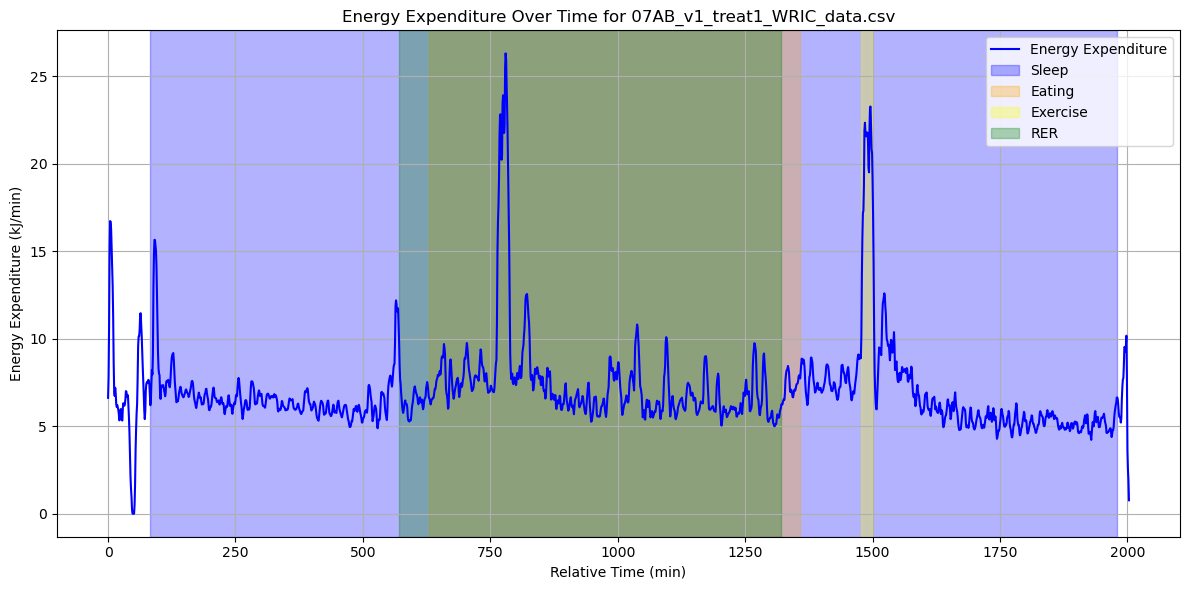

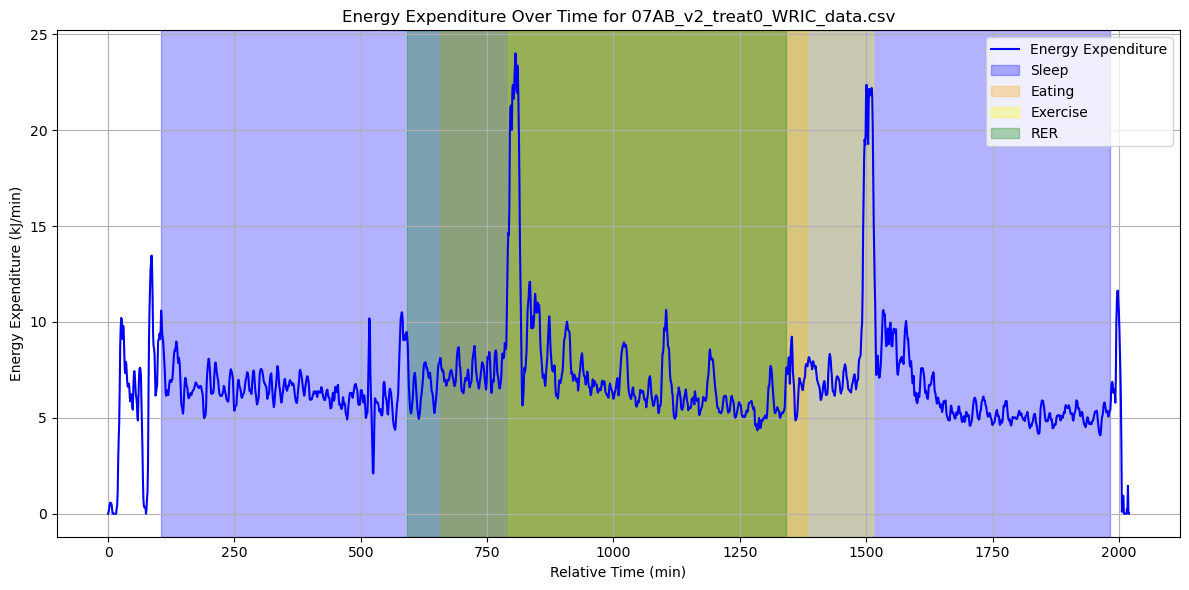

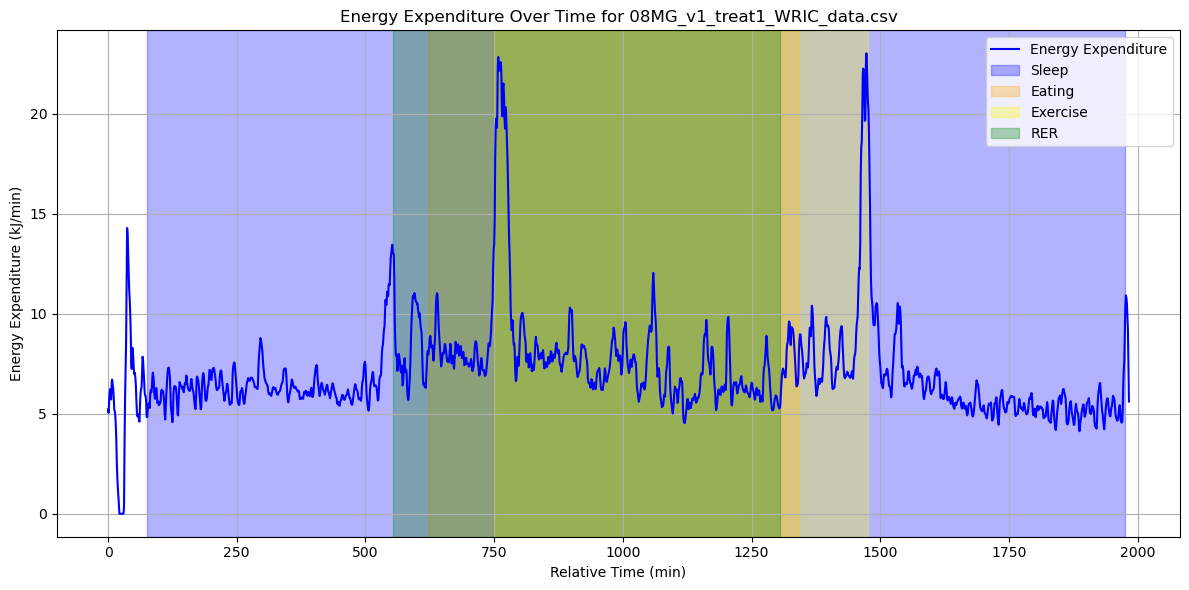

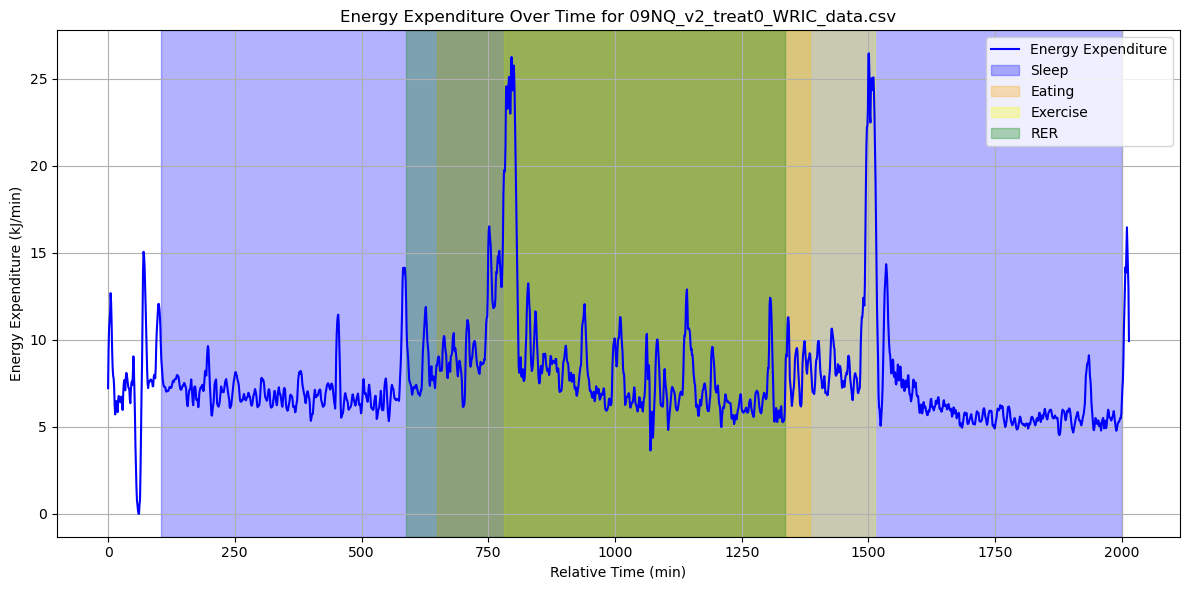

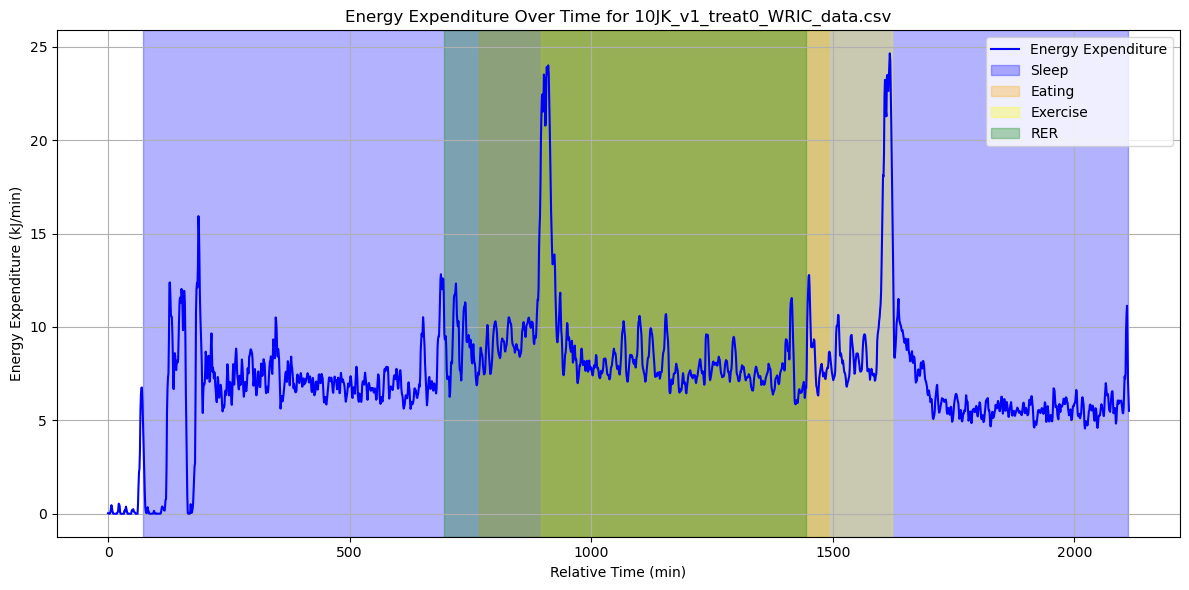

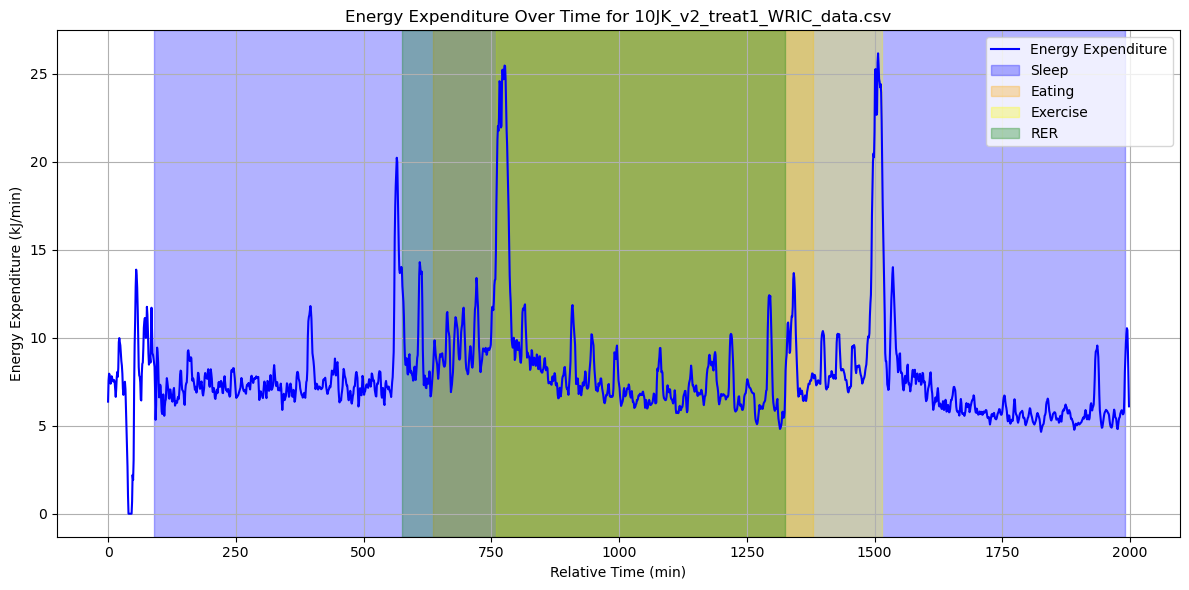

In [7]:
# Path to the folder containing the files
#folder_path = "/media/nina/SUNSHINE/Simon_CIRCLE/WRIC/processed"
# folder_path = "D:/Simon_CIRCLE/WRIC/processed"
folder_path = "/Volumes/SUNSHINE/Simon_CIRCLE/WRIC/processed"
# Step 1: Get all files ending with "_combined.csv"
csv_files = [file for file in os.listdir(folder_path) if file.endswith("_data.csv")]

protocol_colors_labels = {
    0: {"color": "white", "label": "Normal"},
    1: {"color": "blue", "label": "Sleep"},
    2: {"color": "orange", "label": "Eating"},
    3: {"color": "yellow", "label": "Exercise"},
    4: {"color": "green", "label": "RER"},
}

# Step 2: Read files into DataFrames
dataframes = []  # List to store all DataFrames

for file in csv_files:
    # Read the file
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

    # Step 3: Plot energy expenditure ("ee") over time
    plt.figure(figsize=(12, 6))
    plt.plot(df["relative_time[min]"], df["Energy Expenditure (kJ/min)"], label="Energy Expenditure", color="blue")
    #plt.plot(df["relative_time[min]"], df["RER"], label="Energy Expenditure", color="blue")

    # Highlight background based on "protocol" values
    for protocol, group in df.groupby("protocol"):
        protocol_info = protocol_colors_labels.get(protocol, None)
        if protocol_info and protocol != 0:  # Skip coloring for protocol 0
            start_time = group["relative_time[min]"].min()
            end_time = group["relative_time[min]"].max()
            plt.axvspan(start_time, end_time, color=protocol_info["color"], alpha=0.3, label=protocol_info["label"])

    # Add labels, legend, and title
    plt.xlabel("Relative Time (min)")
    plt.ylabel("Energy Expenditure (kJ/min)")
    plt.title(f"Energy Expenditure Over Time for {file}")
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc="upper right")

    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

In [ ]:
a = zip(dataframes[0]["datetime"].tolist(), dataframes[0]["protocol"].tolist())
for d, p in a:
    print(d,p)

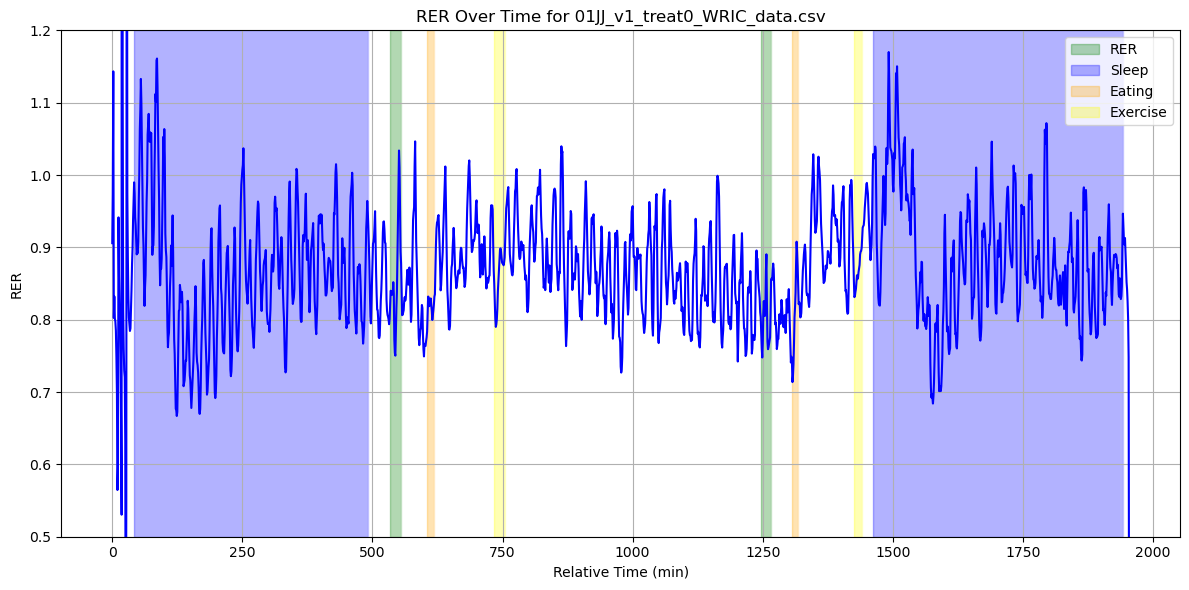

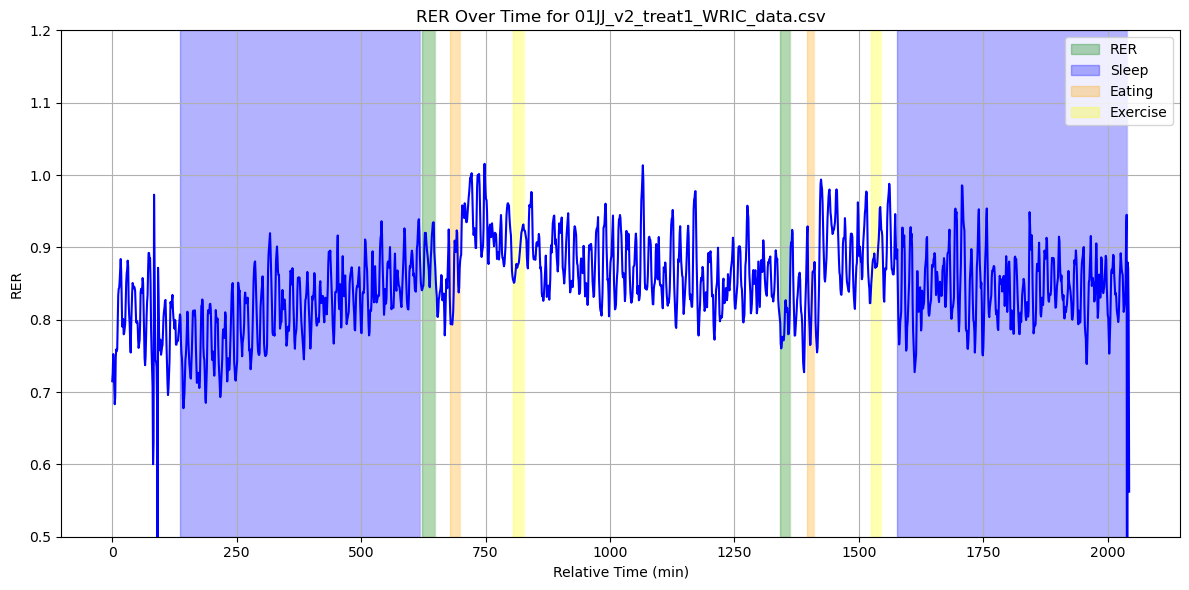

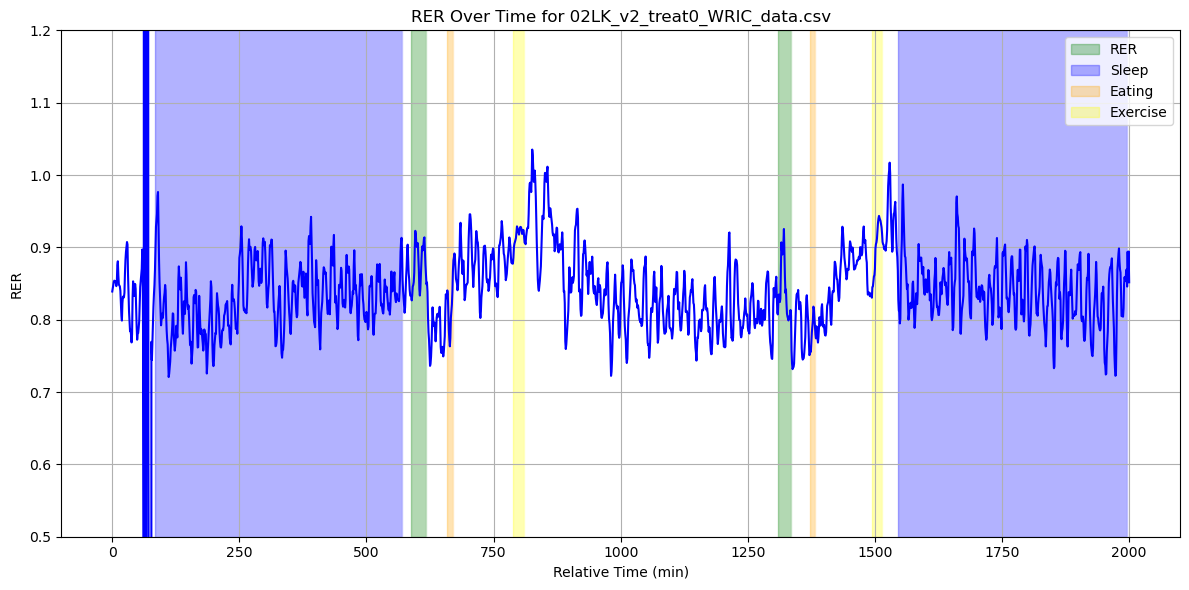

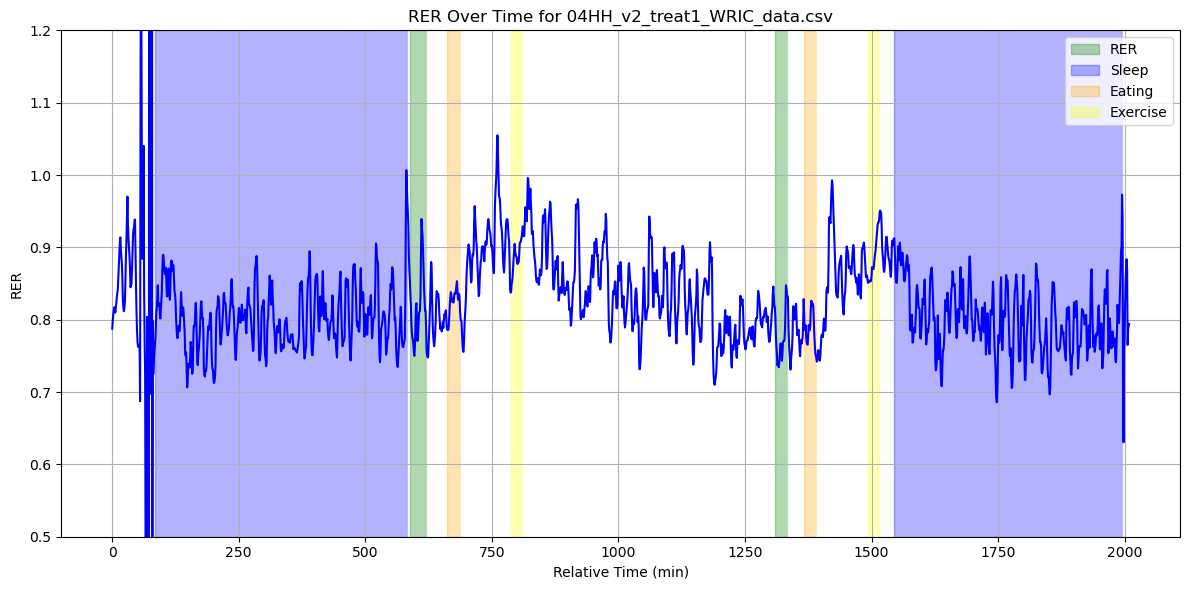

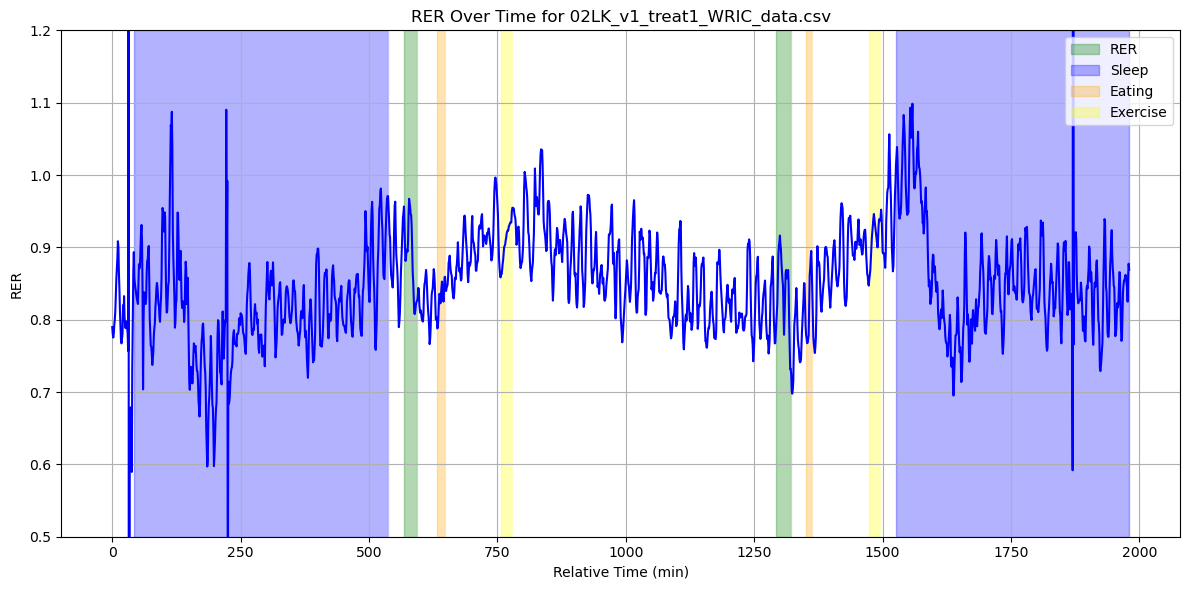

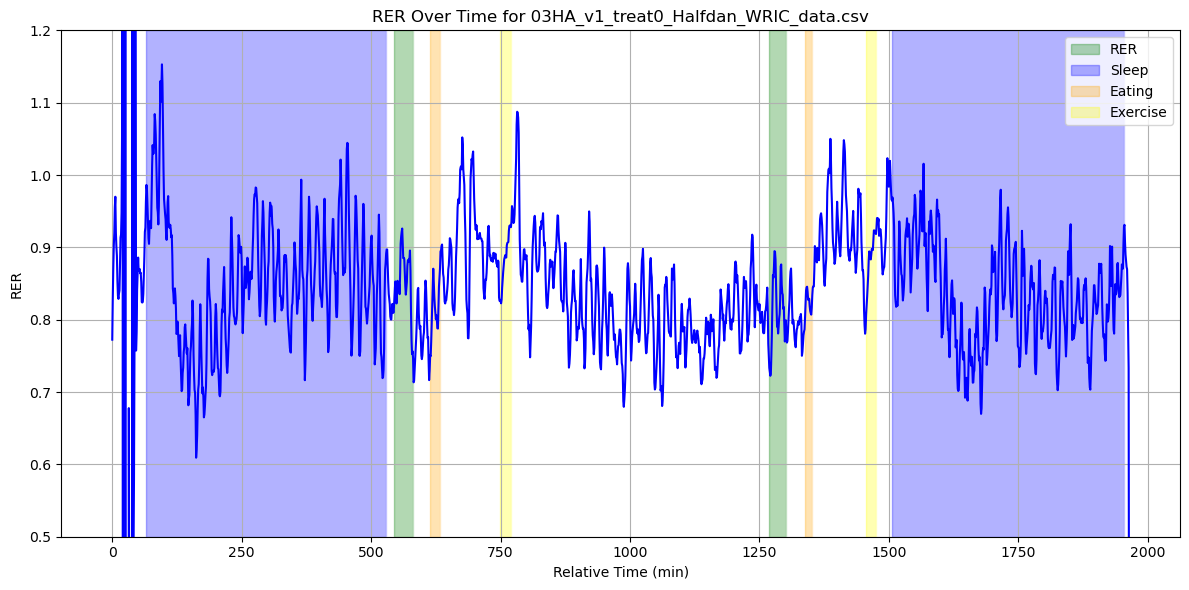

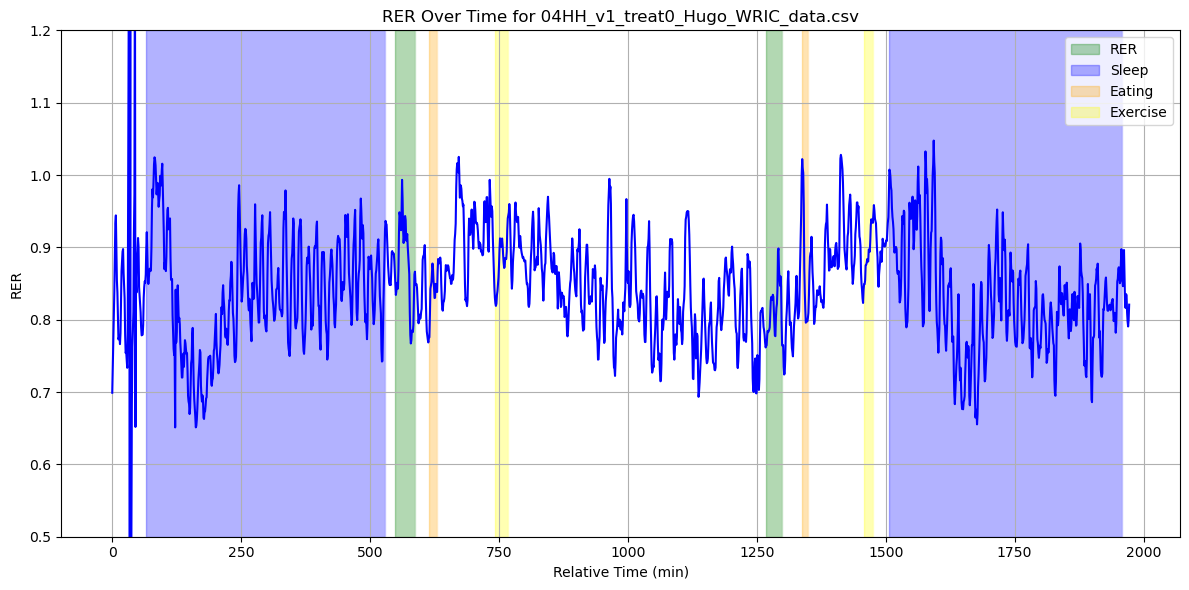

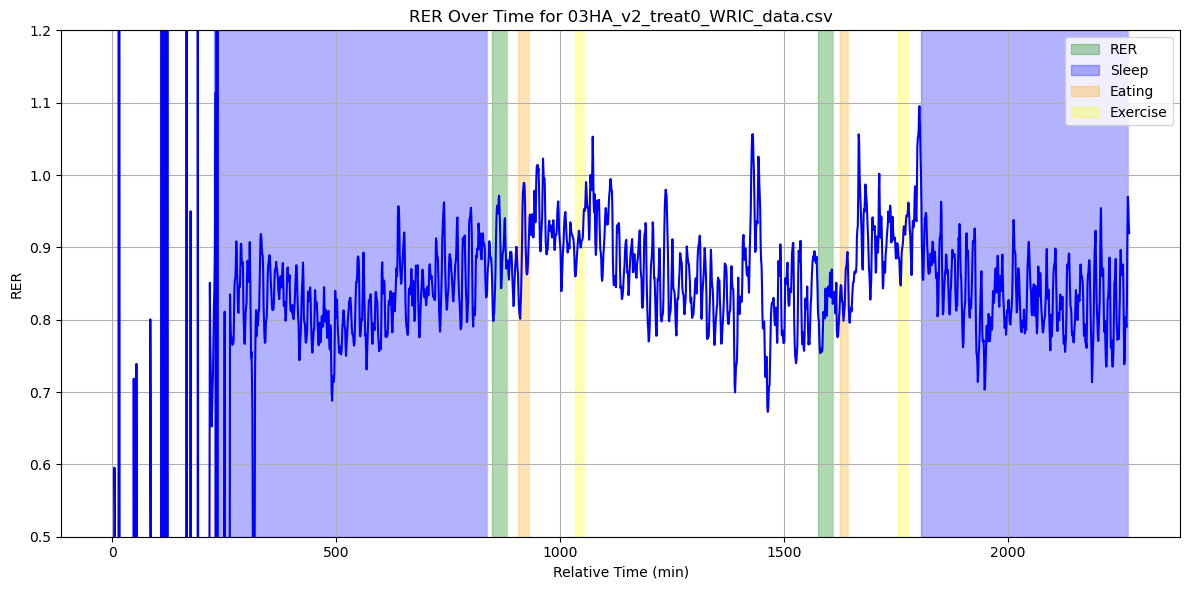

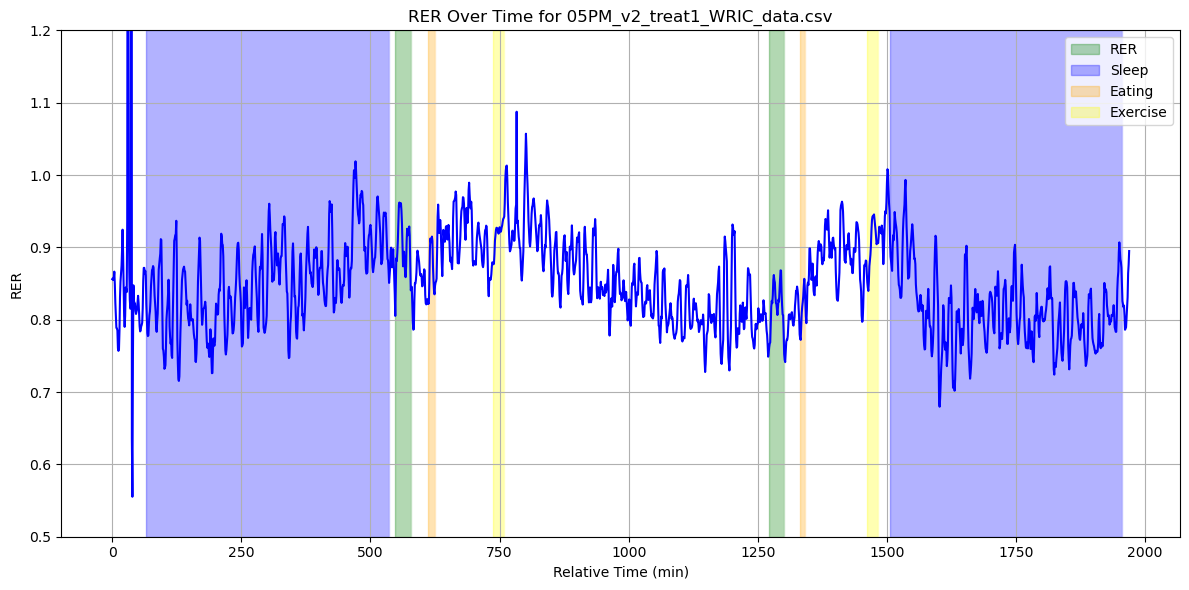

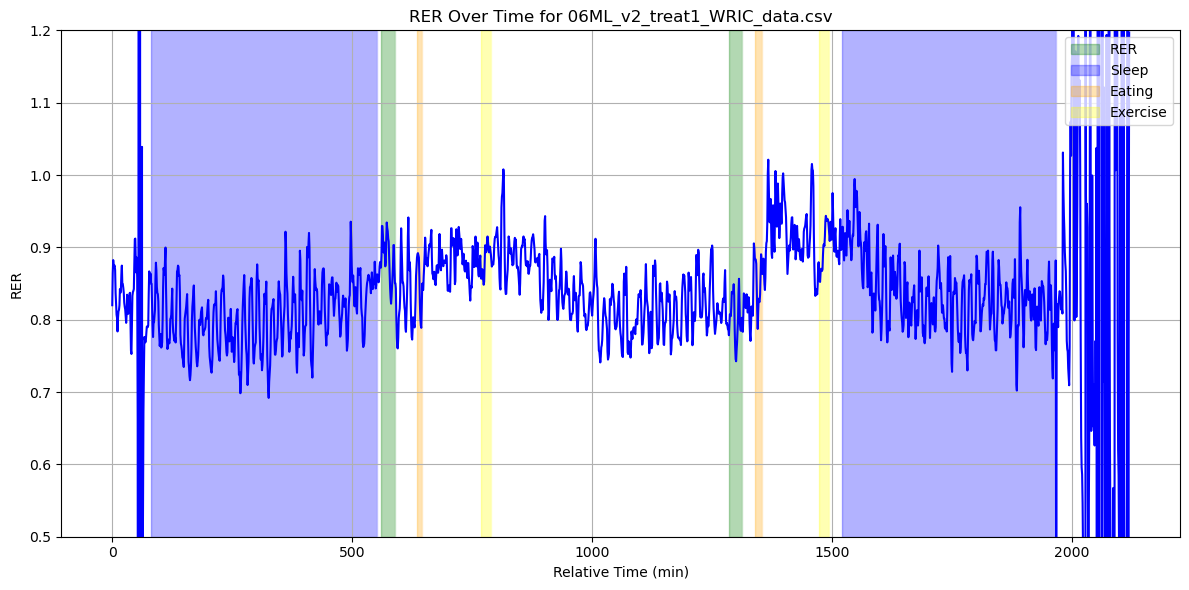

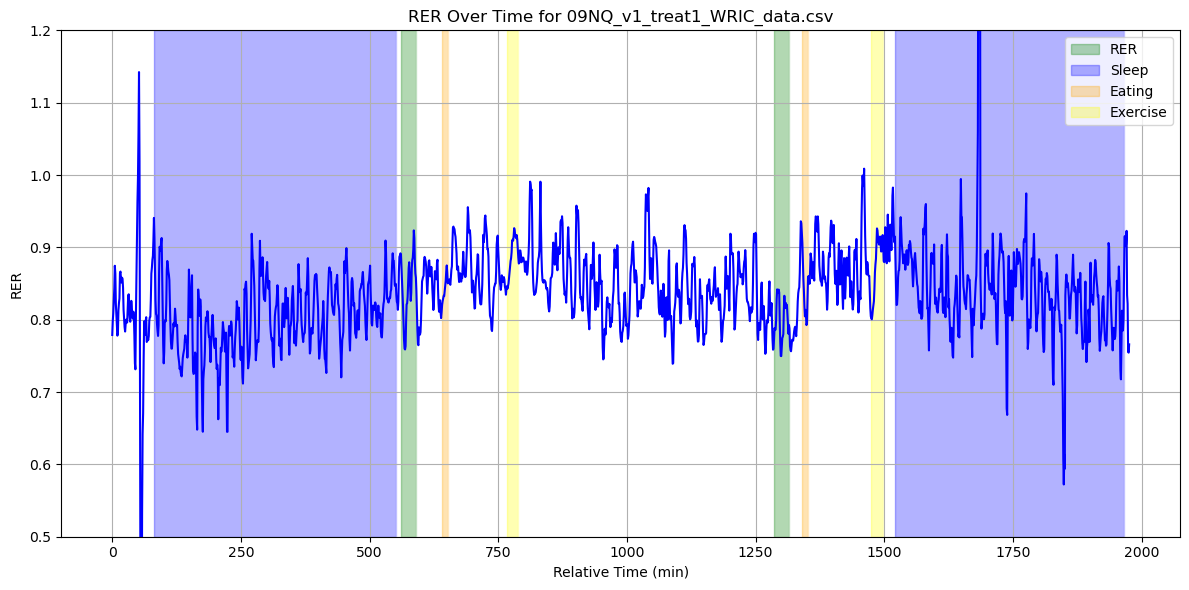

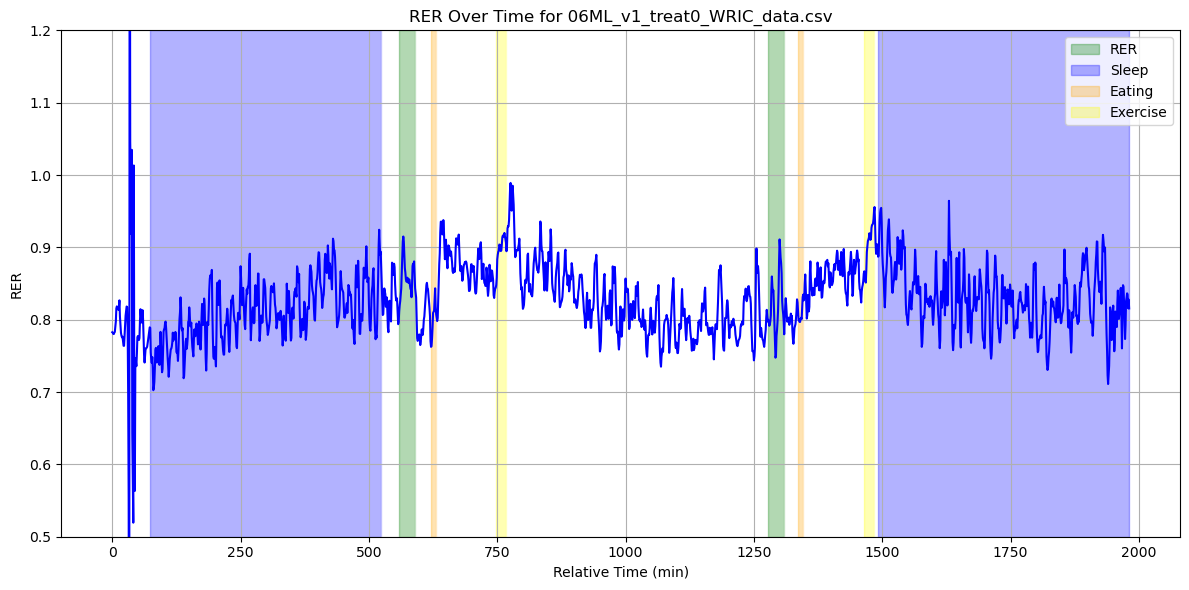

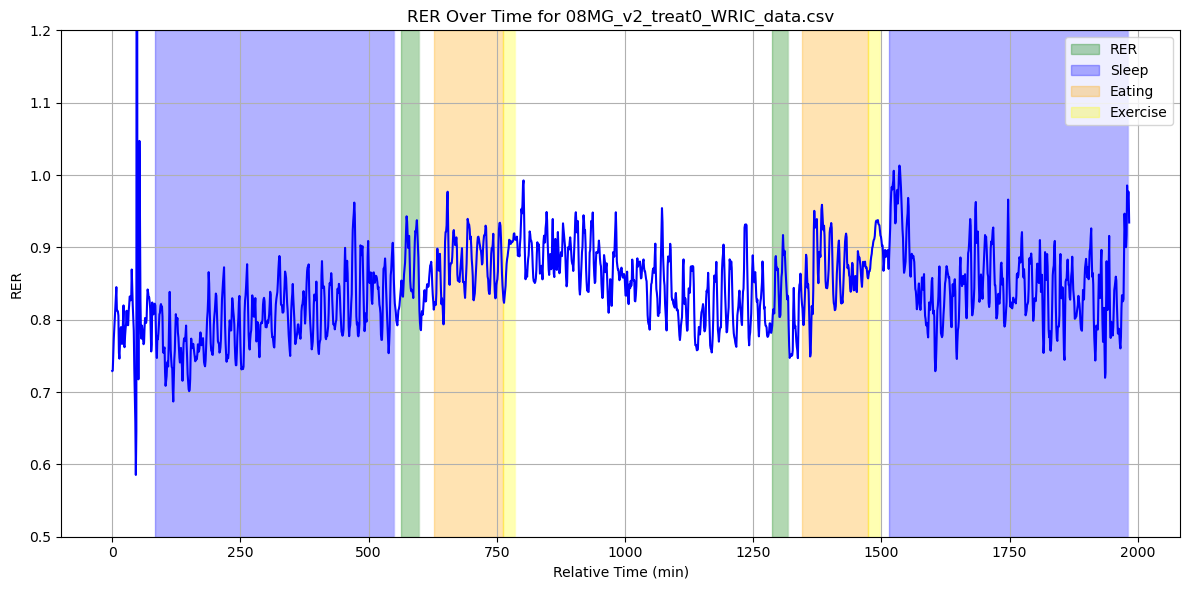

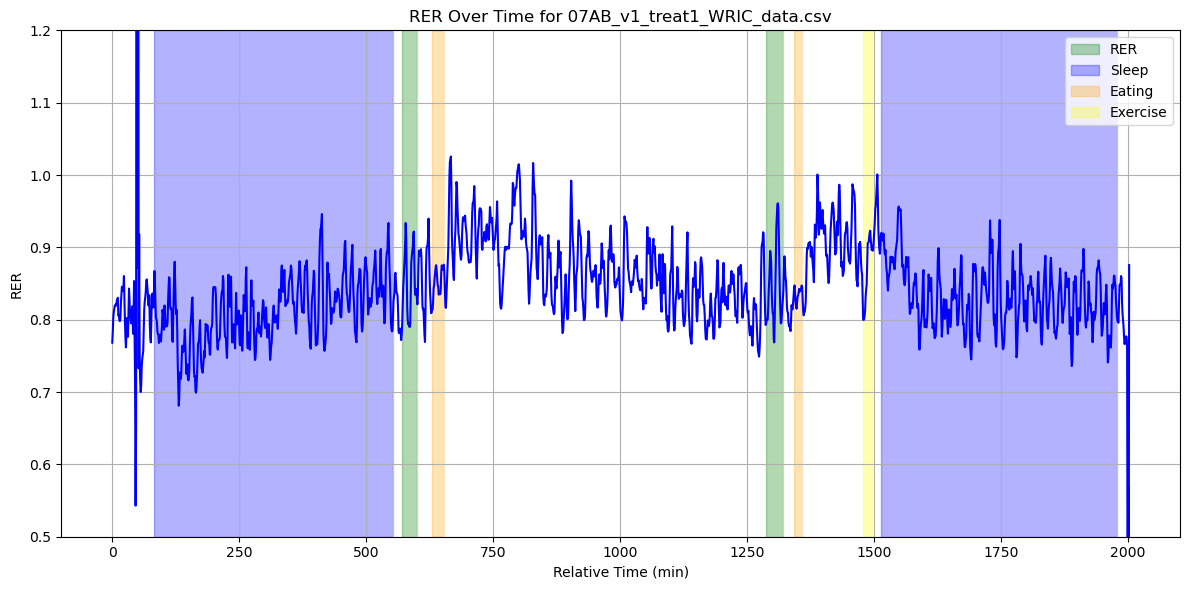

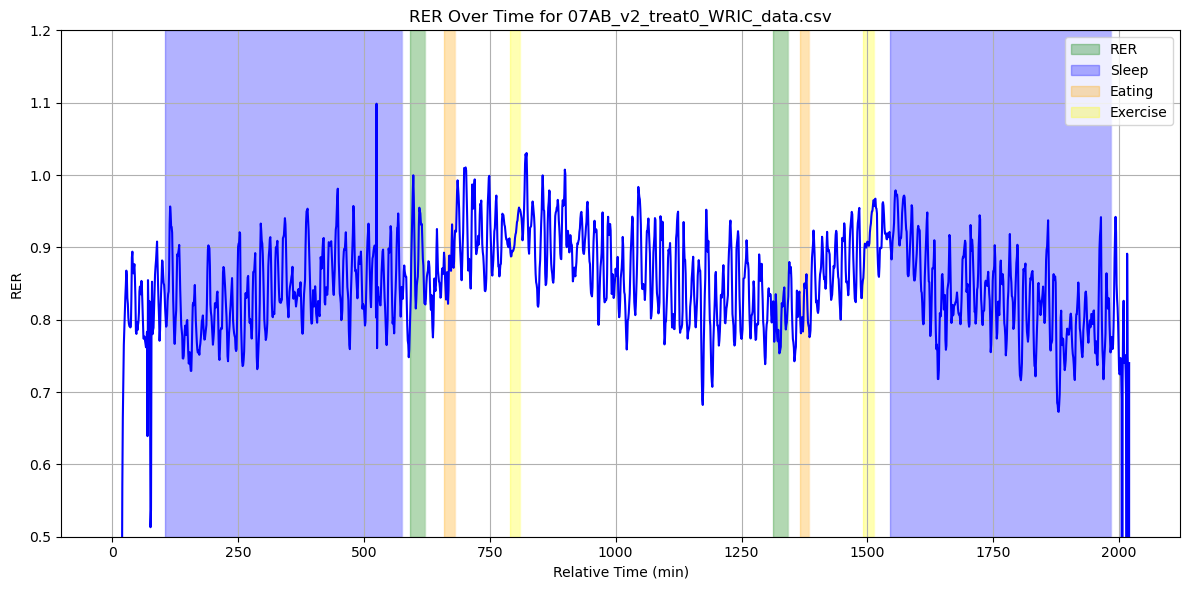

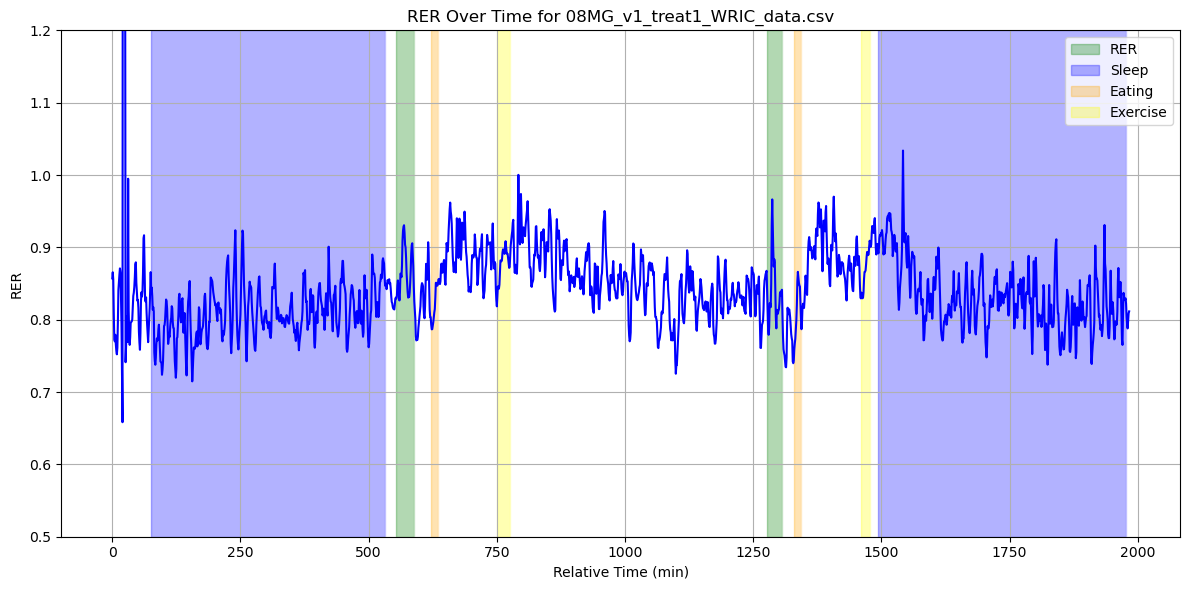

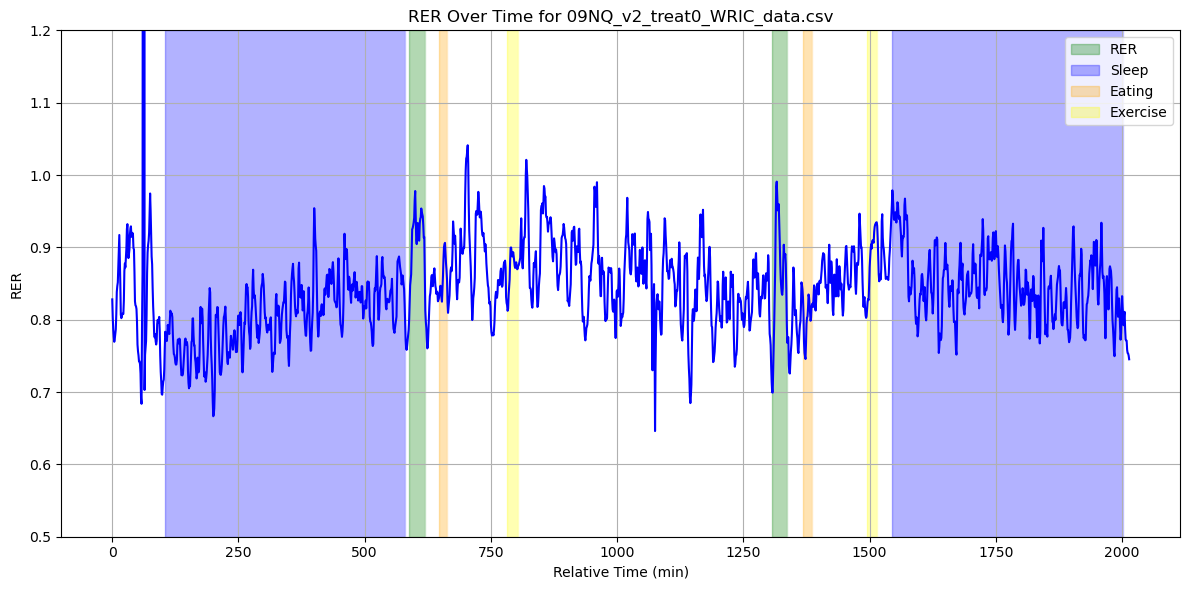

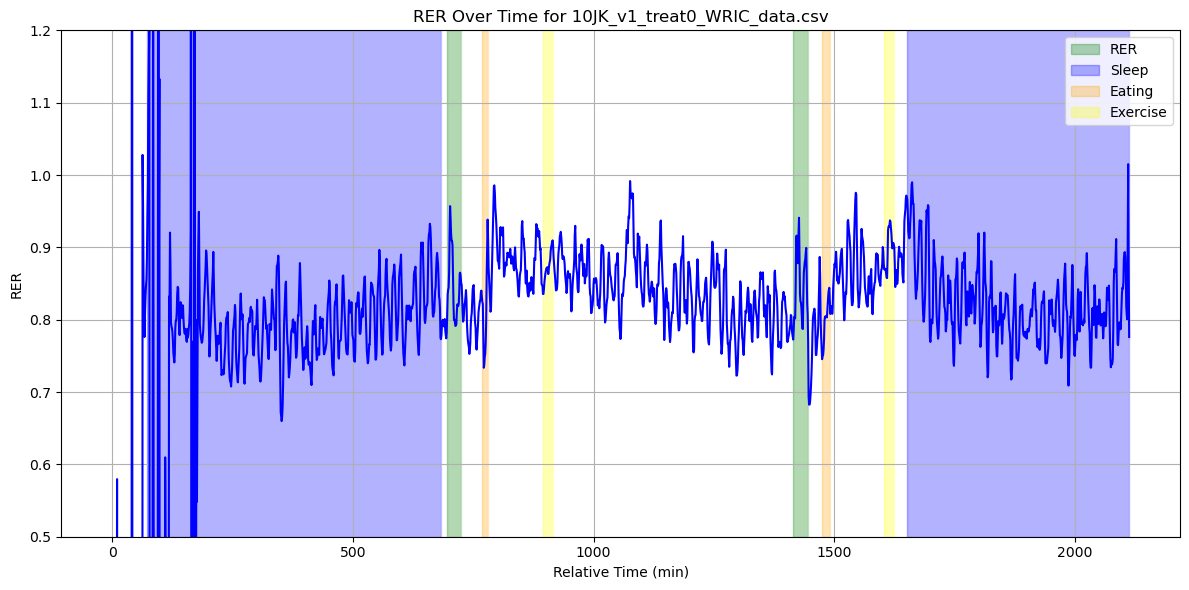

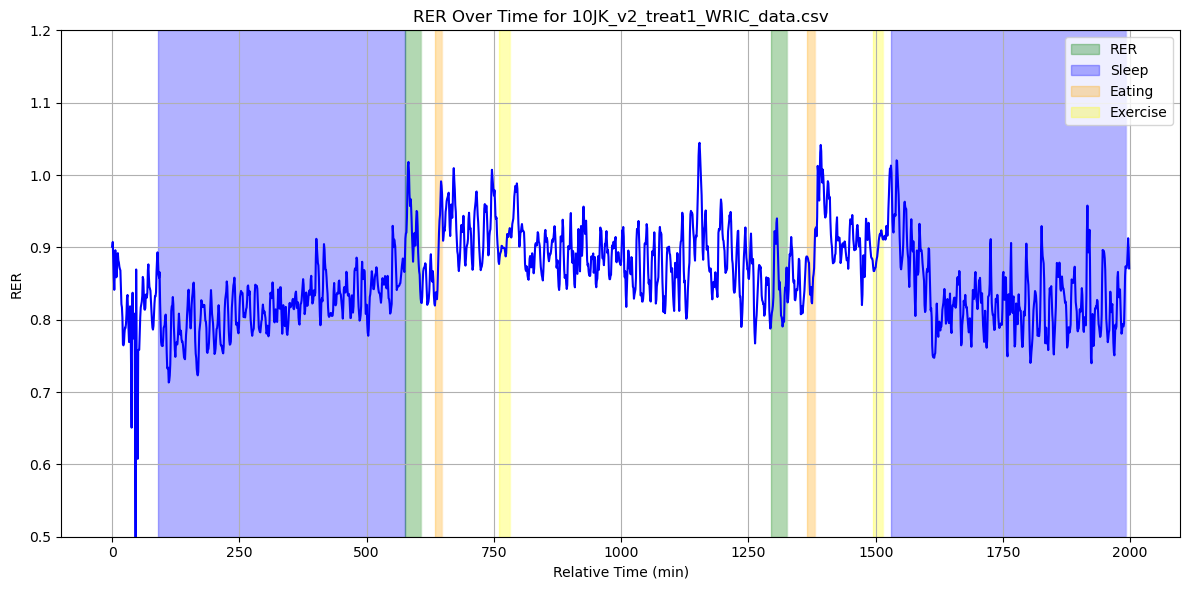

In [8]:
# Path to the folder containing the files
#folder_path = "/media/nina/SUNSHINE/Simon_CIRCLE/WRIC/processed"
#folder_path = "D:/Simon_CIRCLE/WRIC/processed"
folder_path = "/Volumes/SUNSHINE/Simon_CIRCLE/WRIC/processed"
# Step 1: Get all files ending with "_data.csv"
csv_files = [file for file in os.listdir(folder_path) if file.endswith("_data.csv")]

protocol_colors_labels = {
    0: {"color": "white", "label": "Normal"},
    1: {"color": "blue", "label": "Sleep"},
    2: {"color": "orange", "label": "Eating"},
    3: {"color": "yellow", "label": "Exercise"},
    4: {"color": "green", "label": "RER"},
}

# Step 2: Read files into DataFrames
dataframes =  {}  # List to store all DataFrames

for file in csv_files:
    # Read the file
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes[file[:7]] = df

    # Step 3: Plot energy expenditure ("ee") over time
    plt.figure(figsize=(12, 6))
    plt.plot(df["relative_time[min]"], df["RER"], label="RER", color="blue")

    previous_protocol = None
    start_time = None

    for idx, row in df.iterrows():
        current_protocol = row["protocol"]
        time = row["relative_time[min]"]
        
        # If the protocol changes, or this is the last row
        if current_protocol != previous_protocol or idx == len(df) - 1:
            # If a valid protocol range is ongoing, highlight it
            if previous_protocol is not None and previous_protocol in protocol_colors_labels:
                protocol_info = protocol_colors_labels[previous_protocol]
                plt.axvspan(start_time, time, color=protocol_info["color"], alpha=0.3, label=protocol_info["label"])
            
            # Update the start time for the new protocol
            start_time = time
        
        previous_protocol = current_protocol

    # Add labels, legend, and title
    plt.xlabel("Relative Time (min)")
    plt.ylabel("RER")
    plt.title(f"RER Over Time for {file}")
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = {label: handle for label, handle in zip(labels, handles) if label != "Normal"}
    plt.legend(by_label.values(), by_label.keys(), loc="upper right")

    plt.ylim(0.5, 1.2)
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

In [ ]:
print(dataframes.keys())

In [ ]:
example = dataframes["09NQ_v2"]
plt.plot(example["relative_time[min]"], example["RER"], label="RER", color="blue")
plt.ylim(0.4,1.2)
plt.plot()

signal = np.array(example["RER"])
signal = signal - np.mean(signal)

fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=1/60)  # Frequency bins

# Keep only the positive frequencies
positive_freqs = frequencies[:len(frequencies)//2]
magnitude = np.abs(fft_result[:len(fft_result)//2])

In [ ]:
plt.plot(example["relative_time[min]"], example["VCO2"], label="RER", color="blue")
plt.plot()

In [ ]:


fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=1/60)  # Frequency bins

# Keep only the positive frequencies
positive_freqs = frequencies[:len(frequencies)//2]
magnitude = np.abs(fft_result[:len(fft_result)//2])

plt.figure(figsize=(10, 6))
plt.stem(positive_freqs, magnitude)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

In [ ]:
signal = signal - np.mean(signal)
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=1/60)  # Frequency bins

# Keep only the positive frequencies
positive_freqs = frequencies[:len(frequencies)//2]
magnitude = np.abs(fft_result[:len(fft_result)//2])

plt.figure(figsize=(10, 6))
plt.stem(positive_freqs, magnitude)
plt.title("Frequency Spectrum after subtracting mean")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
#plt.xlim(0,5)
plt.grid()
plt.show()

In [ ]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(magnitude, height=20)
sign_freq = positive_freqs[peaks]
print(sign_freq)

In [ ]:
target_frequency = sign_freq[7]  # First significant frequency
bandwidth = 0.1  # Adjust as needed

# Create a filter mask
mask = (positive_freqs >= target_frequency - bandwidth) & (positive_freqs <= target_frequency + bandwidth)

# Apply the mask and reconstruct the signal
filtered_fft = np.zeros_like(fft_result)
filtered_fft[:len(mask)] = fft_result[:len(mask)] * mask
filtered_signal = np.fft.ifft(filtered_fft).real

# Plot the filtered signal
plt.plot(filtered_signal)
plt.title(f"Reconstructed Signal for Frequency {target_frequency:.2f} cycles/minute")
plt.show()


In [ ]:
# Identify noise frequency
noise_frequency = 0.54  # Example: 2 cycles per minute
bandwidth = 0.2       # Define a small range around the frequency

# Create a filter to zero out the noise frequency
mask = (frequencies >= noise_frequency - bandwidth) & \
       (frequencies <= noise_frequency + bandwidth)

# Apply the mask to zero out the noise
fft_result[mask] = 0

# Reconstruct the time series
filtered_signal = np.fft.ifft(fft_result).real

# Plot the results
plt.figure(figsize=(12, 6))

# Original time series
plt.subplot(2, 1, 1)
plt.plot(signal, label="Original Signal")
plt.plot(filtered_signal, label="Filtered Signal")
plt.title("Original Time Series")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

In [ ]:
# Define cutoff frequency (in Hz)
cutoff_frequency = 0.8  # Example: 0.03 Hz (~1.8 cycles per minute)

# Create a low-pass filter mask
high_pass_mask = np.abs(frequencies) <= cutoff_frequency

# Apply the high-pass filter
filtered_fft = fft_result * high_pass_mask

# Reconstruct the filtered signal
filtered_signal = np.fft.ifft(filtered_fft).real

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal, label="Original Signal")
plt.plot(filtered_signal, label="Filtered Signal")
plt.title("Low-Pass Filter of "+ str(cutoff_frequency) + " Hz")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.ylim(-0.25, 0.3)
plt.legend()

In [ ]:
plt.plot(fft_result)